<a href="https://colab.research.google.com/github/loisll/MMAI831/blob/main/Assignment5_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
import yfinance as yf
from datetime import datetime

##a. Download the current futures prices for the following underlying with all maturities:
•	Gold

•	Crude Oil

•	Natural gas

•	SP 500

Comments on the price pattern for different maturities (e.g., normal backwardation? Contango?)


In [164]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

# Define assets with their spot and futures symbols
assets = {
    #"Gold": {"spot": "GC=F", "symbol": "GC", "exchange": ".CMX"},
    "Crude Oil": {"spot": "CL=F", "symbol": "CL", "exchange": ".NYM"},
    "Natural Gas": {"spot": "NG=F", "symbol": "NG", "exchange": ".NYM"},
    "S&P 500": {"spot": "^GSPC", "symbol": "ES", "exchange": ".CME"},

    "Gold": {"spot": "GC=F", "symbol": "GC", "exchange": ".CMX"}
}

# Define futures contract month codes
month_codes = {
    "Jan": "F",
    "Feb": "G",
    "Mar": "H",
    "Apr": "J",
    "May": "K",
    "Jun": "M",
    "Jul": "N",
    "Aug": "Q",
    "Sep": "U",
    "Oct": "V",
    "Nov": "X",
    "Dec": "Z"
}

# Define years for futures contracts
years = ["25","26"]  # 2024, 2025, 2026

# Initialize storage for spot and futures prices
futures_prices = {asset: {} for asset in assets}
spot_prices = {}

# Fetch spot prices
for asset, details in assets.items():
    try:
        data = yf.download(details["spot"], period="1d", progress=False)
        if not data.empty:
            spot_prices[asset] = data["Close"].iloc[-1]
    except Exception as e:
        print(f"Error fetching {asset} Spot Price: {e}")

# Fetch futures prices for all assets, months, and years
for asset, details in assets.items():
    for year in years:
        for month, code in month_codes.items():
            contract_ticker = f"{details['symbol']}{code}{year}{details['exchange']}"

            try:
                data = yf.download(contract_ticker, period="1d", progress=False)
                if not data.empty:
                    futures_prices[asset][f"{month} 20{year}"] = data["Close"].iloc[-1]

            except Exception as e:
                print(f"Error fetching {contract_ticker}: {e}")



ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CLF25.NYM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CLG25.NYM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NGF25.NYM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NGG25.NYM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESF25.CME']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=1d) (Yahoo error = "No

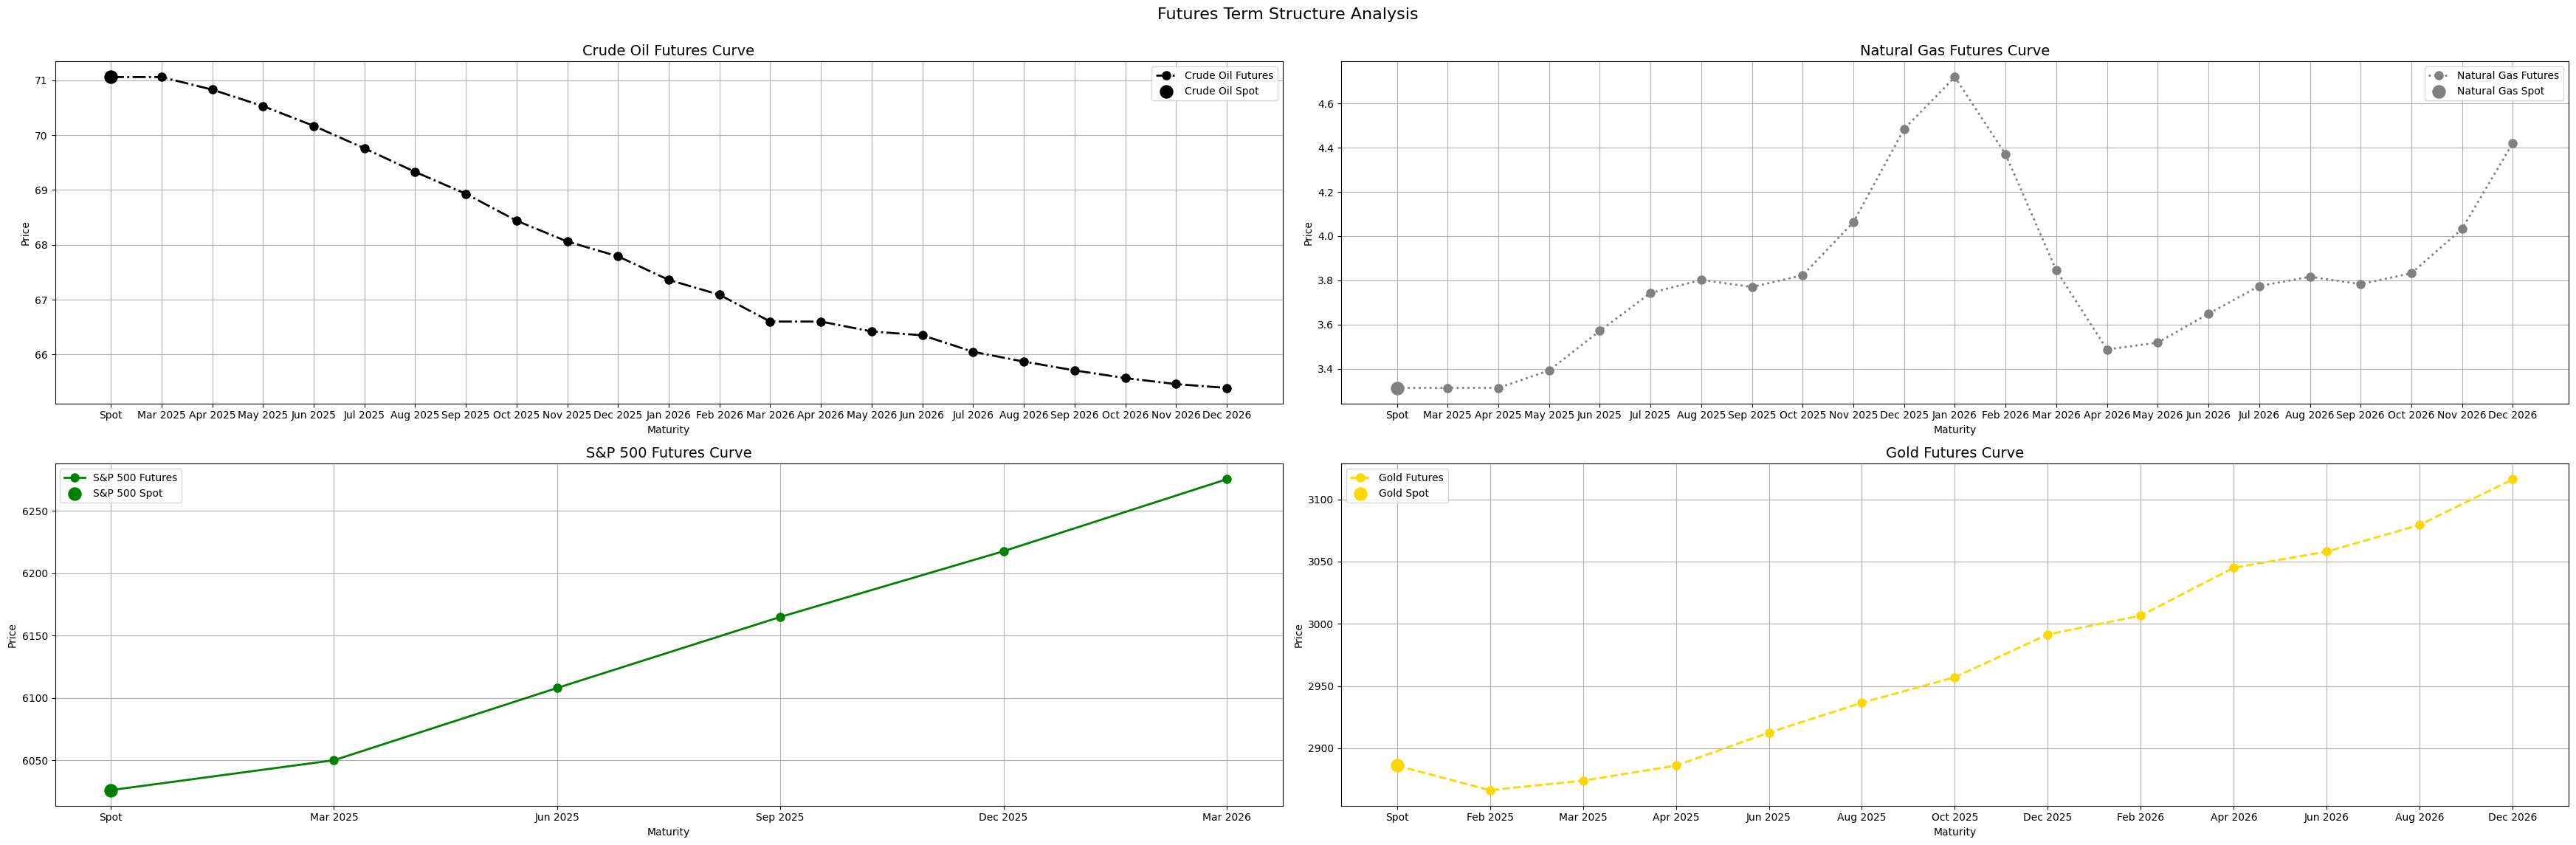

In [181]:
# Create subplots with a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(35, 12))
fig.suptitle('Futures Term Structure Analysis', fontsize=16, y=0.95)

# Flatten axes array for easier iteration
axes_flat = axes.flatten()

# Define styles for each asset
styles = {
    "Gold": {"color": "gold", "linestyle": "--"},
    "Crude Oil": {"color": "black", "linestyle": "-."},
    "Natural Gas": {"color": "gray", "linestyle": ":"},
   "S&P 500": {"color": "green", "linestyle": "-"}
}

# Plot each asset in a separate subplot
for idx, (asset, prices) in enumerate(futures_prices.items()):
    ax = axes_flat[idx]

    # X-axis labels (Spot + Futures months)
    months = ["Spot"] + list(prices.keys())
    prices_list = [spot_prices[asset]] + list(prices.values())

    # Plot futures curve
    ax.plot(months, prices_list,
            marker='o',
            linewidth=2,
            markersize=8,
            color=styles[asset]['color'],
           linestyle=styles[asset]['linestyle'],
            label=f"{asset} Futures")

    # Highlight spot price
    ax.scatter("Spot", spot_prices[asset],
              color=styles[asset]['color'],
               s=150,
               zorder=5,
               label=f"{asset} Spot")

    # Customize each subplot
    ax.set_title(f"{asset} Futures Curve", fontsize=14)
    ax.set_xlabel("Maturity")
    ax.set_ylabel("Price")
    ax.legend()
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###contango and backwardation describe the relationsihp between current prices and futures prices
- contango : futures prices are higher than the current price
- backwardation : futures prices are lower than the current price.


#####1. As of February 6, 2025, the crude oil futures market is exhibiting a backwardation pattern. This means that futures prices are less than the current spot price, which may be caused by trade policies and tariffs.

#####2. As of February 6, 2025, the natural gas futures market is exhibiting a contango pattern, where futures prices are higher than the current spot price. This structure suggests that there is higher natural gas prices in the future, possibly due to factors such as weather parterns (lunar new year impact and seasonal demand). Crude oil prices exhibit seasonal patterns, and futures contracts for January delivery often trade higher than the spot price, reflecting expectations of increased demand or supply constraints during the winter months

#####3. As of February 6, 2025, the gold futures market is exhibiting a contango pattern, where futures prices are higher than the current spot price.it has exhibited a upward trend recently and reach higher.possibly due to factors such as expected supply constraints or increased demand.

#####4. As of February 6, 2025, the S&P 500 futures market is exhibiting a contango structure, where futures prices are higher than the current spot price, mostly due to the cost of carry. but it decline for the next month and then rising, it may be caused by trade policies and tariffs that leading short term market pessimism.



###b.Build a ML model to predict the fron month crude oil price (symbol: CL=F).  You can choose any time period for training the testing.

This analysis explores the use of Long Short-Term Memory (LSTM) networks for time series forecasting, specifically for predicting crude oil prices.
- source: Yahoo Finance
- timeframe: 5 years CL=F close price

Variables Used:
- Date : 5 years Daily timestamps.
- Close Price → crued oil closing price.
- Input Layer → Takes in past 70 days of prices as features.
- Dense (Fully Connected) Layer → Outputs predicted price (the next 1 day).

The LSTM model captures overall trends but struggles with extreme price swings.
Short-term price movements align well with actual market prices.
Price fluctuations are smoothed due to sequential data processing.

In [2]:
# Install required packages if not already installed
# pip install yfinance pandas numpy matplotlib scikit-learn tensorflow keras

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import math

# Fetch historical crude oil futures prices
symbol = "CL=F"
data = yf.download(symbol, period="5y", interval="1d")  # 5 years of daily data
data = data[["Close"]].dropna()


#convert to numpy aarray
#We use 80 of the data for training
train_pct=0.8
dataset=data.values
train_data_len=math.ceil(len(dataset)*train_pct)
dataset.shape

#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data.shape


#split dataset
n_period=70
#training dataset
train_data=scaled_data[0:train_data_len]
x_train=[]
y_train=[]

for i in range(n_period, len(train_data)):
    x_train.append(train_data[i-n_period:i])
    y_train.append(train_data[i,0])## index 60-110 - next 1 day record

#Convert numpy array
x_train, y_train=np.array(x_train), np.array(y_train)

#Reshape into 3D array
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))



#Build the LSTM model predicting next five days (Dense layer must give 5 outputs)
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(10))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=1, epochs=3)

[*********************100%***********************]  1 of 1 completed

Epoch 1/3



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - loss: 0.0286
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - loss: 0.0013
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - loss: 9.6461e-04


In [5]:
# Create Test Data

test_data=scaled_data[train_data_len-70:,:]#This selects a portion of the scaled dataset that starts 70 time steps before the training data ends and includes all the remaining data.
x_test=[]
y_test=dataset[train_data_len:,:]

for i in range(n_period, len(test_data)):
    x_test.append(test_data[i - n_period:i, 0])  # Use past 60 days for prediction

# Convert to numpy arrays and reshape for LSTM
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions_scaled = model.predict(x_test)

# Predictions should have shape (num_samples, 5)
print(f"Predictions shape: {predictions_scaled.shape}")

# Inverse transform the data
predictions=predictions_scaled*(scaler.data_max_[0]-scaler.data_min_[0])+scaler.data_min_[0]

#RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions shape: (252, 10)


0.006302218967013889

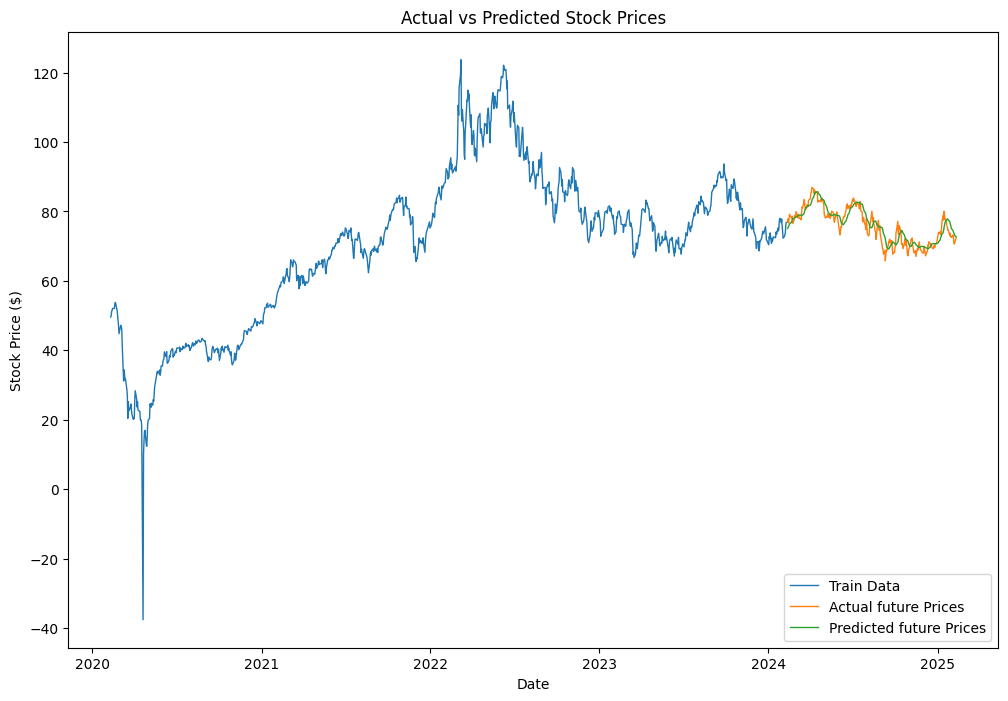

In [6]:
#data=data['Close']

train = data[:train_data_len]  # Training data (up to train_data_len)
valid = data[train_data_len:]  # Test data (after train_data_len)

# Create a dataframe for the validation with predictions
valid = valid.assign(Predictions=predictions[:,0])  # predictions[:,0] selects the first column if multi-step prediction

# Plot the actual and predicted values
plt.figure(figsize=(12,8))
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.plot(train, lw=1, label='Train Data')
plt.plot(valid['Close'], lw=1, label='Actual future Prices')  # Plot actual test data
plt.plot(valid['Predictions'], lw=1, label='Predicted future Prices')  # Plot predicted values
plt.legend(loc='lower right')
plt.show()

In [17]:
mse = mean_squared_error(valid['Close'], valid['Predictions'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(valid['Close'], valid['Predictions'])
#mape = np.mean(np.abs((valid['Close'] - valid['Predictions']) / valid['Close'])) * 100
mape = np.mean(np.abs((y_test - predictions) / np.where(y_test == 0, 1, y_test))) * 100

r2 = r2_score(valid['Close'], valid['Predictions'])

 # Print performance metrics
print("\nLSTM Model Performance Metrics:")
print("=" * 50)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R2) Score: {r2:.4f}")


LSTM Model Performance Metrics:
Mean Squared Error (MSE): 5.38
Root Mean Squared Error (RMSE): 2.32
Mean Absolute Error (MAE): 1.86
Mean Absolute Percentage Error (MAPE): 2.33%
R-squared (R2) Score: 0.7999


RMSE = 2.32 shows the model's average error is small, meaning it makes reasonably accurate predictions.

MAE = 1.86 indicates On average, the model's predictions are off by $1.86, which is acceptable for short-term forecasting.

R² = 0.7999 → The model captures ~80% of the data's variance, indicating a good fit.

##3.	Use the market data for options on SP500.
a.	What are implied volatility and volatility smile?


Implied Volatility (IV) is the market's expected future volatility of an asset's price, derived from option prices. It reflects how much traders expect the asset to move but does not predict the direction of the movement. the implied volatility of an option is the volatility for which the Black-Scholes-Merton price euqals the market price.

A volatility smile is a curve that shows how implied volatility varies for different option strike prices of the same expiration date.

###b.	Plot the volatility smiles for SP500 option prices for a relatively short maturity (for example, about 3 months) and a longer maturity (for example about 6 months). Comment on the shape of volatility smile.


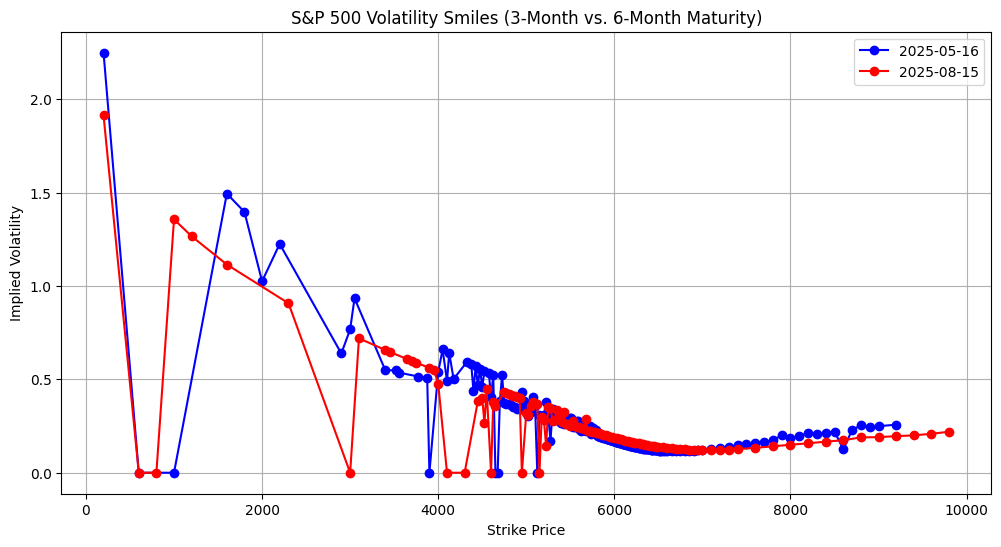

In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Fetch S&P 500 index options data
spx = yf.Ticker("^SPX")
expirations = spx.options  # List of available expiration dates

# Function to find the closest expiration date to a target number of days
def find_closest_expiration(target_days):
    today = datetime.today()
    return min(expirations, key=lambda d: abs((datetime.strptime(d, "%Y-%m-%d") - today).days - target_days))

# Select expiration dates for short (3M) and long (6M) maturities
short_maturity_days = 90  # 3 months
long_maturity_days = 180  # 6 months

short_expiration = find_closest_expiration(short_maturity_days)
long_expiration = find_closest_expiration(long_maturity_days)

# Fetch option chains for selected expirations
short_chain = spx.option_chain(short_expiration)
long_chain = spx.option_chain(long_expiration)

# Extract Calls Data (since calls and puts often have similar IV patterns)
short_calls = short_chain.calls
long_calls = long_chain.calls

# Filter data for plotting
short_strikes = short_calls["strike"]
short_iv = short_calls["impliedVolatility"]

long_strikes = long_calls["strike"]
long_iv = long_calls["impliedVolatility"]

# Plot the volatility smile for 3-month and 6-month maturities
plt.figure(figsize=(12, 6))

# Short Maturity (3 months)
plt.plot(short_strikes, short_iv, marker='o', linestyle='-', label={short_expiration}, color="blue")

# Long Maturity (6 months)
plt.plot(long_strikes, long_iv, marker='o', linestyle='-', label={long_expiration}, color="red")

# Labels and Formatting
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title("S&P 500 Volatility Smiles (3-Month vs. 6-Month Maturity)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


A pronounced volatility smile suggests traders expect potential large price moves at extreme strikes.
Higher IV in OTM puts could indicate hedging against downside risk.
Longer-dated options tend to have flatter smiles, meaning volatility is more stable over longer periods.

Observations:
Both curves show a U-shape (volatility smile)


- interpretation


Shorter-maturity options (T = 3M) have more pronounced IV changes and steeper, meaning traders expect more near-term price fluctuations.the steep smile indicates that the market is pricing in a hihger probability of large, abrupt moves in the short term. and would be more reactive to market events due to Fed policy, inflation data, geopolitical risks.


Longer-maturity options (T = 6M) have flatter and less pronounced and smoother IV curves, indicating more stable long-term volatility expectations.implied volatility for otm puts and calls is still higher than for ATM options, but the diiference is smaller. the flatter smile eflects a more balanced view of risk over the long term.
